In [4]:
import os
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [5]:
path = "https://raw.githubusercontent.com/ekaratnida/Automated_Tools-/keep/Mini-bads3/cust_churn.csv"
df = pd.read_csv(path)
df.head()

,CUST_CODE,FEB_VISIT,FEB_PRODUCT,FEB_STORE,MAR_CHURN
0,CUST0000026911,3,8,1,0
1,CUST0000092645,5,46,2,0
2,CUST0000109188,1,22,1,0
3,CUST0000128103,1,2,1,0
4,CUST0000281089,5,14,1,0


0    2700
1      71
Name: MAR_CHURN, dtype: int64

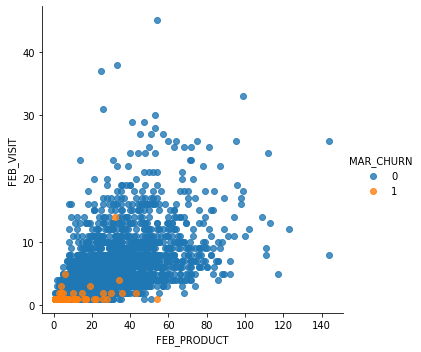

In [6]:
import seaborn as sns

ax = sns.lmplot( x="FEB_PRODUCT", y="FEB_VISIT", data=df, fit_reg=False, hue='MAR_CHURN', legend=True)
df['MAR_CHURN'].value_counts()


In [7]:
x = df.iloc[:,1:-1]
x.head(5)

,FEB_VISIT,FEB_PRODUCT,FEB_STORE
0,3,8,1
1,5,46,2
2,1,22,1
3,1,2,1
4,5,14,1


In [8]:
y = df.iloc[:,-1:]
y.head(5)

,MAR_CHURN
0,0
1,0
2,0
3,0
4,0


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

MAR_CHURN
0            1889
1              50
dtype: int64
MAR_CHURN
0            811
1             21
dtype: int64


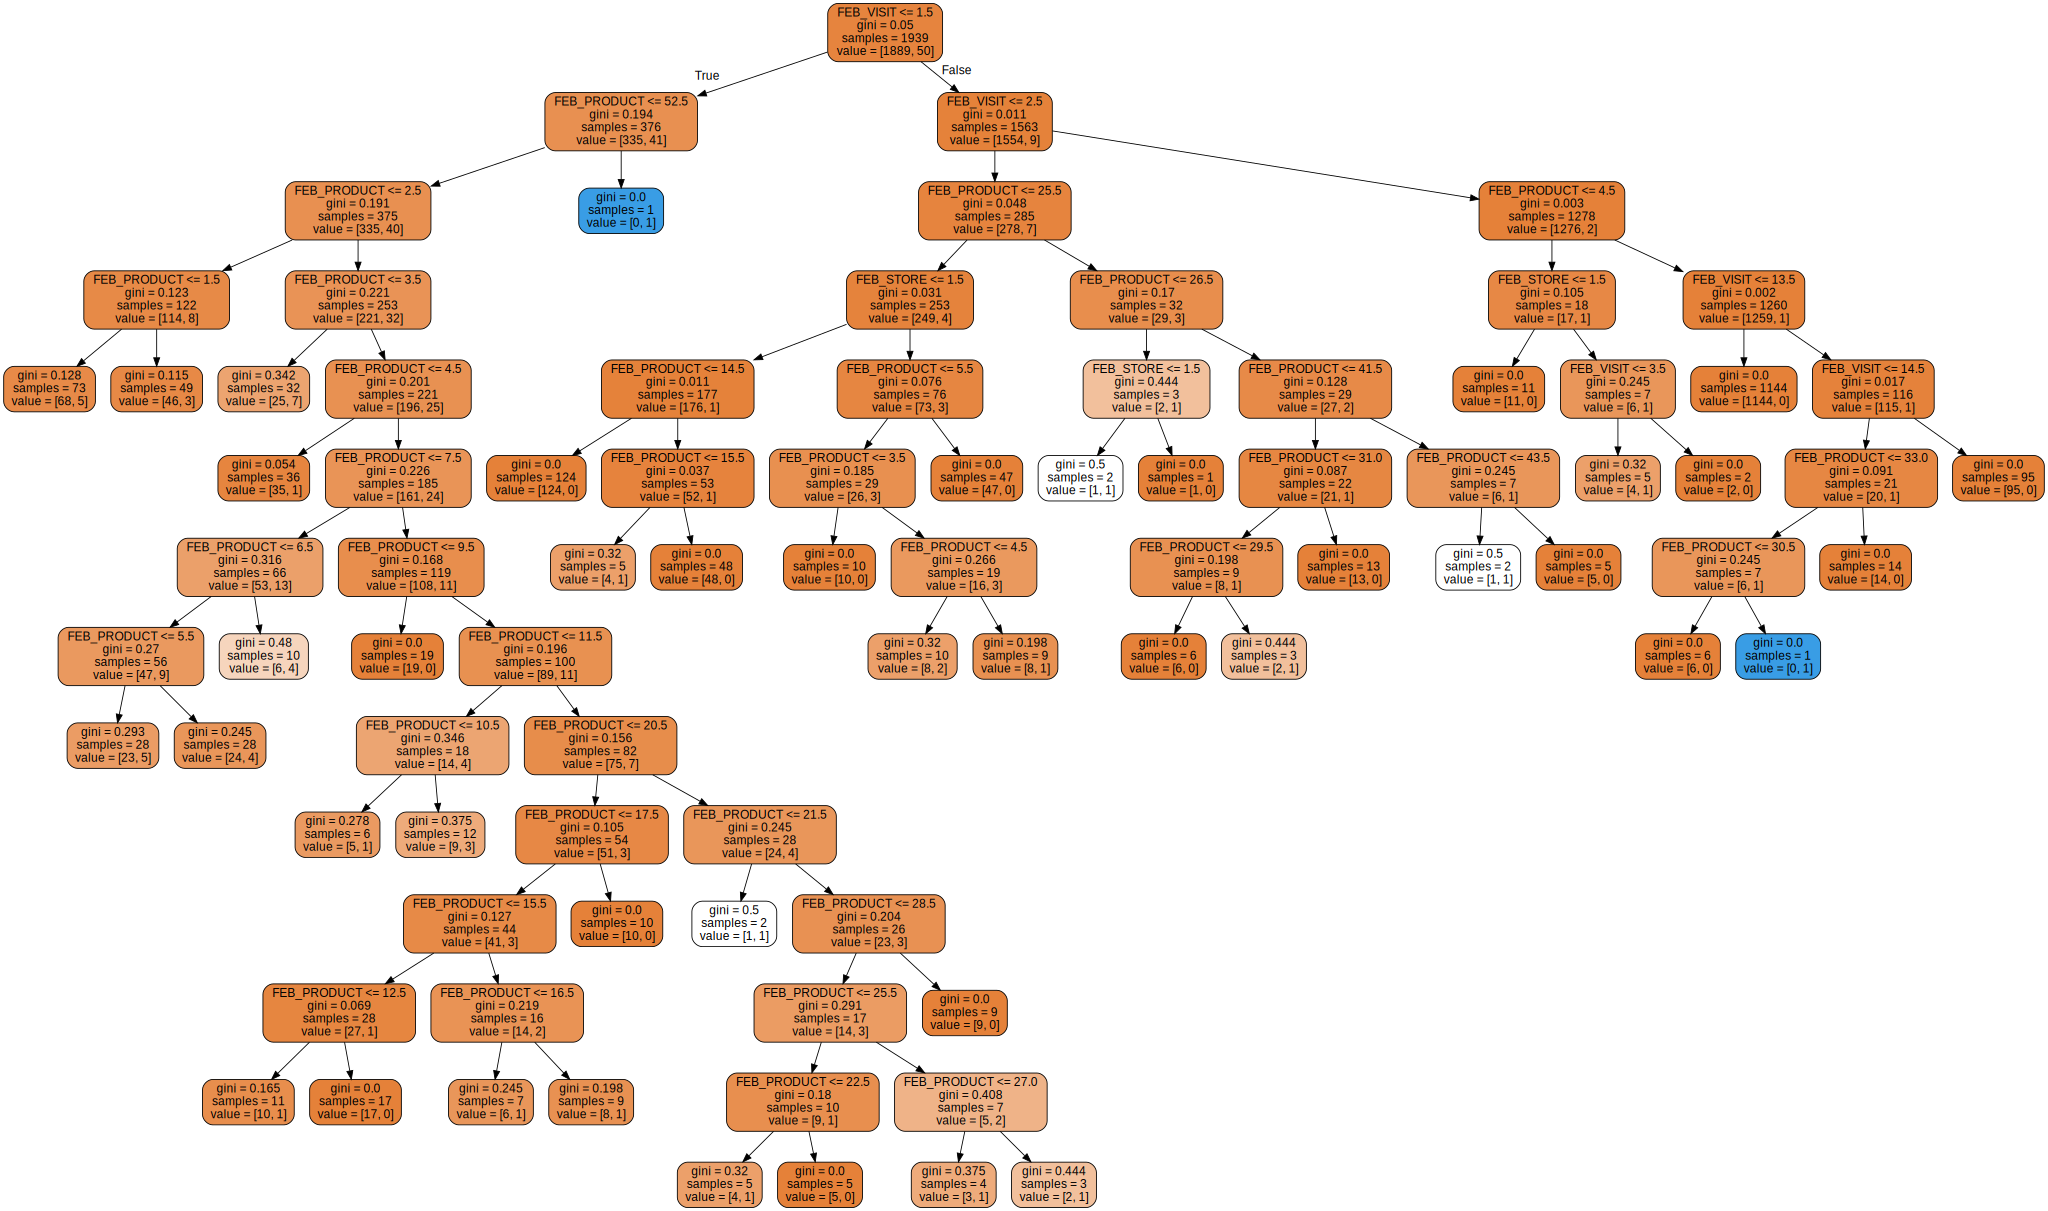

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, feature_names=x_train.columns) 
graph = graphviz.Source(dot_data) 
#graph.render("churn")
graph

In [11]:
!pip install dtreeviz

     |████████████████████████████████| 62 kB 643 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67936 sha256=7ec3d0e0965bd3141ed5a36a7fe64017e3af96a2f0de1b229c816fa99190e048
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


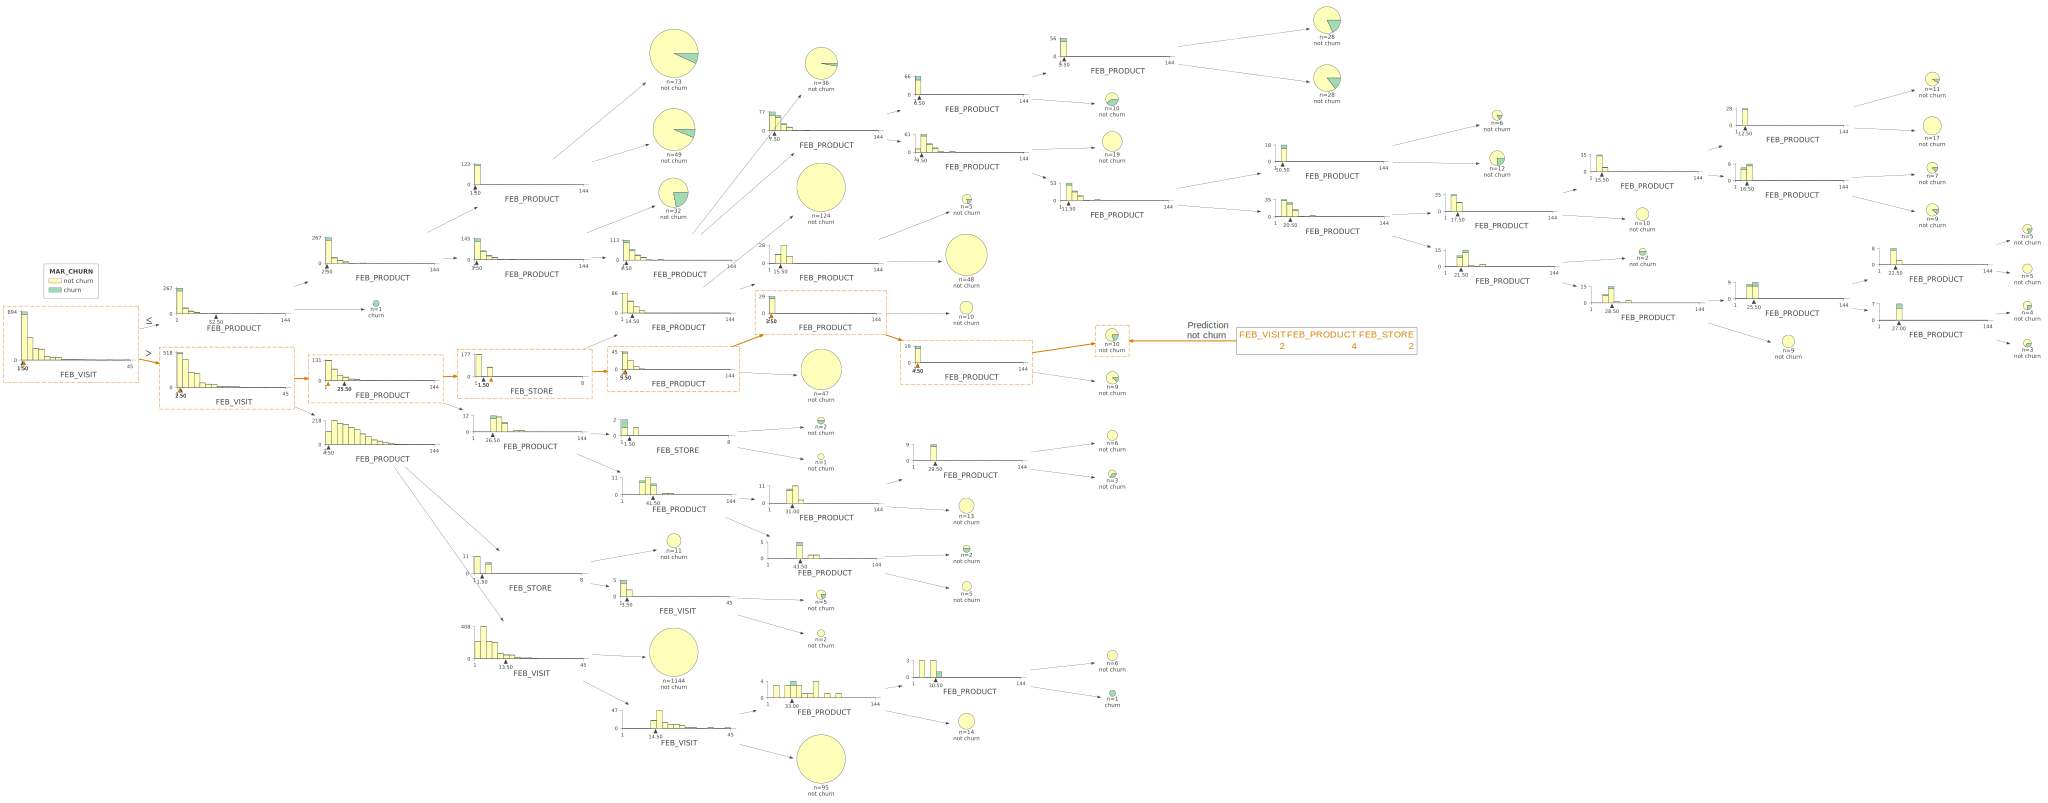

In [12]:
from dtreeviz.trees import *

viz = dtreeviz(clf, 
               x_train.values, 
               y_train['MAR_CHURN'],
               target_name='MAR_CHURN',
               feature_names= ["FEB_VISIT","FEB_PRODUCT","FEB_STORE"],
               class_names=["not churn","churn"],
               orientation ='LR',
               X=x_test.iloc[0,:]
              )  
              
viz

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)
print(y_pred)
confusion_matrix_train = confusion_matrix(y_test, y_pred)
print(confusion_matrix_train)

TruePositive = confusion_matrix_train[1,1]
print("TP=",TruePositive)
FalseNegative = confusion_matrix_train[1,0]
print("FN=",FalseNegative)

TrueNegative = confusion_matrix_train[0,0]
print("TN=",TrueNegative)
FalsePositive = confusion_matrix_train[0,1]
print("FP=",FalsePositive)



from sklearn.metrics import classification_report

target_names = ['not churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Apply negative downsampling

In [14]:
y_train_pos = y_train[y_train['MAR_CHURN']==1]
y_train_neg = y_train[y_train['MAR_CHURN']==0]
#print("origin ", y_train_neg)
y_train_neg = y_train_neg.sample(int(y_train_neg.shape[0] * 0.2), random_state=42)
#print("down ", y_train_neg)
y_train_new = pd.concat([y_train_pos, y_train_neg])
x_train_new = x_train.loc[y_train_new.index]
y_train_new.value_counts()

MAR_CHURN
0            377
1             50
dtype: int64

In [15]:
clf = tree.DecisionTreeClassifier(random_state = 42)
clf = clf.fit(x_train_new, y_train_new)

In [16]:
y_pred = clf.predict(x_test)

confusion_matrix_train = confusion_matrix(y_test, y_pred)
print(confusion_matrix_train)

TruePositive = confusion_matrix_train[1,1]
print("TP = ", TruePositive)

FalsePositive = confusion_matrix_train[1,0]
print("FP = ", FalsePositive)

TrueNegative = confusion_matrix_train[0,0]
print("TN = ", TrueNegative)

FalseNegative = confusion_matrix_train[0,1]
print("FN = ", FalseNegative)

target_names = ['not churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

[[762  49]
 [ 17   4]]
TP =  4
FP =  17
TN =  762
FN =  49
              precision    recall  f1-score   support

   not churn       0.98      0.94      0.96       811
       churn       0.08      0.19      0.11        21

    accuracy                           0.92       832
   macro avg       0.53      0.57      0.53       832
weighted avg       0.96      0.92      0.94       832



<H1> Pre pruning

In [17]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier(random_state=42)
params = {
          'max_depth': [2,4,6,8,10,12,14,16],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

gcv = GridSearchCV(estimator=clf,param_grid=params) #k-fold = 5
gcv.fit(x_train_new, y_train_new)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [18]:
clf = gcv.best_estimator_
print(clf)
clf.fit(x_train_new, y_train_new)
y_pred = clf.predict(x_test)
#inclass
#print(y_pred)

confusion_matrix_train = confusion_matrix(y_test, y_pred)
print(confusion_matrix_train)

TruePositive = confusion_matrix_train[1,1]
print("TP = ", TruePositive)

FalsePositive = confusion_matrix_train[1,0]
print("FP = ", FalsePositive)

TrueNegative = confusion_matrix_train[0,0]
print("TN = ", TrueNegative)

FalseNegative = confusion_matrix_train[0,1]
print("FN = ", FalseNegative)

target_names = ['not churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))


DecisionTreeClassifier(max_depth=2, random_state=42)
[[811   0]
 [ 21   0]]
TP =  0
FP =  21
TN =  811
FN =  0
              precision    recall  f1-score   support

   not churn       0.97      1.00      0.99       811
       churn       0.00      0.00      0.00        21

    accuracy                           0.97       832
   macro avg       0.49      0.50      0.49       832
weighted avg       0.95      0.97      0.96       832



<H1> Post pruning

In [19]:
clf = tree.DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(x_train_new, y_train_new)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00005576 0.00011592 0.00059477 0.00062451 0.00078064
 0.00083268 0.00117096 0.00140515 0.00140515 0.00140515 0.00155511
 0.00156128 0.00172484 0.00234192 0.00246358 0.00277967 0.00297128
 0.00305372 0.00323665 0.0046682  0.00493762 0.00605388 0.04167226]


In [20]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train_new, y_train_new)
    clfs.append(clf)

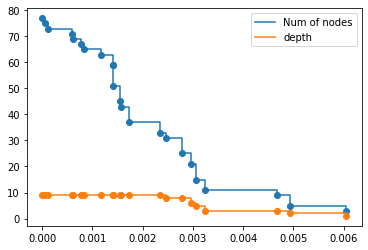

In [21]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='Num of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

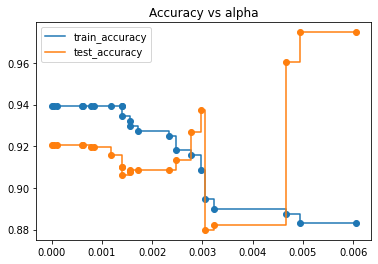

In [22]:
from sklearn.metrics import accuracy_score
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train_new)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train_new))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [23]:
clf = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.001)
clf.fit(x_train_new, y_train_new)
y_pred = clf.predict(x_test)
#print(y_test)

confusion_matrix_train = confusion_matrix(y_test, y_pred)
print(confusion_matrix_train)

TruePositive = confusion_matrix_train[1,1]
print("TP = ", TruePositive)

FalsePositive = confusion_matrix_train[1,0]
print("FP = ", FalsePositive)

TrueNegative = confusion_matrix_train[0,0]
print("TN = ", TrueNegative)

FalseNegative = confusion_matrix_train[0,1]
print("FN = ", FalseNegative)

target_names = ['not churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))


[[761  50]
 [ 17   4]]
TP =  4
FP =  17
TN =  761
FN =  50
              precision    recall  f1-score   support

   not churn       0.98      0.94      0.96       811
       churn       0.07      0.19      0.11        21

    accuracy                           0.92       832
   macro avg       0.53      0.56      0.53       832
weighted avg       0.96      0.92      0.94       832

